<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Epid_T6_SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
!pip install EoN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 113 kB 4.8 MB/s 
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120818 sha256=d4dfd90ba6c675bebb75641d324acd3536706597cdda17ae3918512c9dc8a17a
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built EoN


In [3]:
import EoN

import networkx as nx
from matplotlib import rc
import matplotlib.pylab as plt

#import scipy
#import random
import numpy as np

import scipy.stats as stats

# Ejercicio 3.

In [5]:
N=1000          #Numero de individuos
tau = 0.5       # tasa de transmisión
gamma = 0.1     # tasa de recuperación
#ts = scipy.arange(0,40,0.05)
n_sim = 100      # number of simulations to run for each
def sir_sim(k_poiss, N, n_sim,nodo_fijo):
    report_times = np.arange(0,30,0.1) #scipy.linspace(0,30,3000)
    sums = 0*report_times
    I_s=[]
    K_s=[]
    for iter in range(n_sim):
        G = nx.configuration_model(k_poiss)
        t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds=nodo_fijo)#initial_infecteds es el nodo infectado.
        K_s.append(G.degree[nodo_fijo])#Regresa el grado del nodo inicial.
        I_s.append(R[-1])#Los que se recuperaron. i.e, el total de individuos infectados al final de la epidemia
    return(K_s,I_s)

In [1]:
M_k=[]
SD_k=[]
for count_k in range(100):#Para cada red.
    np.random.seed(count_k)
    ksum=1
    if(count_k%20==0):
        print("Iteración :",count_k)
    while(ksum%2!=0):#Que defina una grafica.
        k=np.random.poisson(3.5,1000)
        ksum=sum(k)
    K_s_k,I_s_k=sir_sim(k_poiss=k,N=N,n_sim=100,nodo_fijo=0)#Cada uno tiene longitud "count"
    mean_k=np.mean(I_s_k)
    sd_k=np.std(I_s_k)
    M_k.append(mean_k)
    SD_k.append(sd_k)

NameError: ignored

In [103]:
print(np.std(M_k))
print(np.std(SD_k))

347.8104053477986
101.12574985711903


(array([2., 0., 0., 0., 0., 0., 0., 0., 1., 7.]),
 array([  1.    ,  90.4648, 179.9296, 269.3944, 358.8592, 448.324 ,
        537.7888, 627.2536, 716.7184, 806.1832, 895.648 ]),
 <a list of 10 Patch objects>)

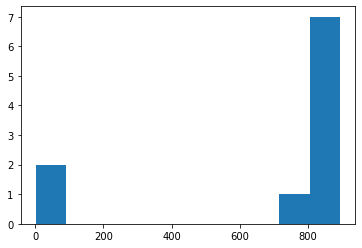

In [136]:
plt.hist(M_k)

In [153]:
K_s=[]
I_s=[]
Coef_assortativity_degree=[]
Coef_agrupamiento=[]
for k in range(100):
    np.random.seed(k)
    nodo=np.random.randint(0,1000)
    ksum=1
    while(ksum%2!=0):
        k_poiss=np.random.poisson(3.5,1000)
        ksum=sum(k_poiss)
    G = nx.configuration_model(k_poiss)
    K_s.append(G.degree[nodo])
    Coef_assortativity_degree.append(nx.assortativity.degree_assortativity_coefficient(G))#Diferente para cada grafica.
    G2 = nx.DiGraph(G)#Para calcular el clustering
    Coef_agrupamiento.append(nx.clustering(G2,nodo))#Diferente para cada grafica
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds=0)#initial_infecteds es el nodo infectado.
    I_s.append(R[-1])#Los que se recuperaron


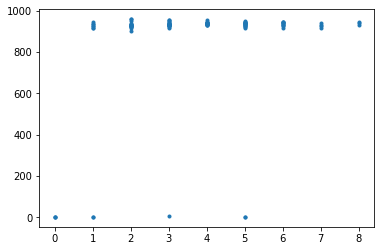

In [93]:
plt.plot(K_s,I_s,'.')

In [155]:
x=np.array(np.array(K_s).reshape((-1, 1)))
x2=np.array(np.array(Coef_assortativity_degree).reshape((-1, 1)))
x3=np.array(np.array(Coef_agrupamiento).reshape((-1, 1)))
y=np.array(I_s)

In [177]:
df = pd.DataFrame(data)
import statsmodels.api as sm
x = sm.add_constant(df['grado']) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print(model.ess)
print_model = model.summary()
print(print_model)

6727.632820509374
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.07751
Date:                Tue, 15 Nov 2022   Prob (F-statistic):              0.781
Time:                        02:13:06   Log-Likelihood:                -709.45
No. Observations:                 100   AIC:                             1423.
Df Residuals:                      98   BIC:                             1428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        814.1031     66.883  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


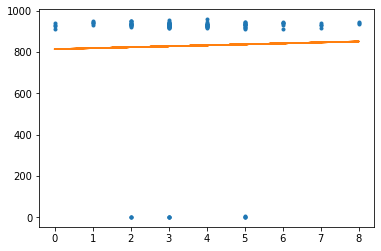

In [178]:
plt.plot(K_s,I_s,'.')
plt.plot(K_s,model.params[0]+np.array(K_s)*model.params[1])
plt.show()

In [179]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
data = {'grado': K_s,
        'assortivity': Coef_assortativity_degree,
        'clustering': Coef_agrupamiento,       
        }
import pandas as pd
df = pd.DataFrame(data)
import statsmodels.api as sm
x = sm.add_constant(df) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print(model.ess)
print_model = model.summary()
print(print_model)

42665.830527540296
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.1612
Date:                Tue, 15 Nov 2022   Prob (F-statistic):              0.922
Time:                        02:13:17   Log-Likelihood:                -709.24
No. Observations:                 100   AIC:                             1426.
Df Residuals:                      96   BIC:                             1437.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         812.2075     67.5

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Ejercicio 4

In [187]:
ksum=1
while(ksum%2!=0):
    k_poiss=np.random.poisson(3,1000)
    ksum=sum(k_poiss)
G = nx.configuration_model(k_poiss)
R=[0]
while(R[-1]<10):
    t, S, I, R = EoN.fast_SIR(G, 0.1, 1, initial_infecteds=0)#initial_infecteds es el nodo infectado.

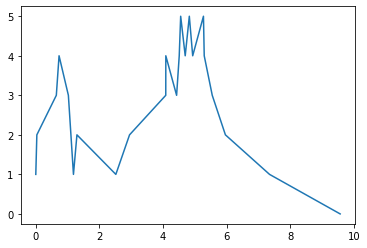

In [189]:
plt.plot(t,I)
plt.show()

In [223]:
j=0
aggreg=0
by_days_accum=[]
for k in range(1,10):
    while(t[j]<k):
        aggreg+=I[j]
        j+=1
    by_days_accum.append(aggreg)

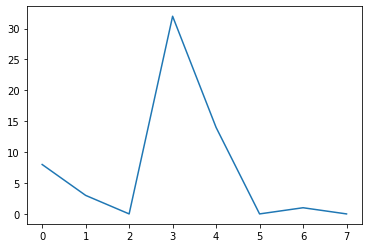

In [225]:
plt.plot(np.diff(by_days_accum))

In [226]:
by_days_accum

[10, 18, 21, 21, 53, 67, 67, 68, 68]